# Connectivity-Based (Hierarchical) Clustering: BIRCH

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset. BIRCH is often used to complement other clustering algorithms by creating a summary of the dataset that the other clustering algorithm can now use. However, BIRCH has one major drawback — it can only process metric attributes. A metric attribute is any attribute whose values can be represented in Euclidean space i.e., no categorical attributes should be present.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import Birch

## Load data

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X[:10]

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       [ 1.78634822, -1.78265314],
       [ 1.01675094,  1.06256946],
       [-1.51405201, -1.8110384 ],
       [ 0.84364975, -1.57914694],
       [ 0.65799375,  0.07621282],
       [ 1.24395165,  0.17407616],
       [ 1.34096685,  0.13010495]])

## Explore data

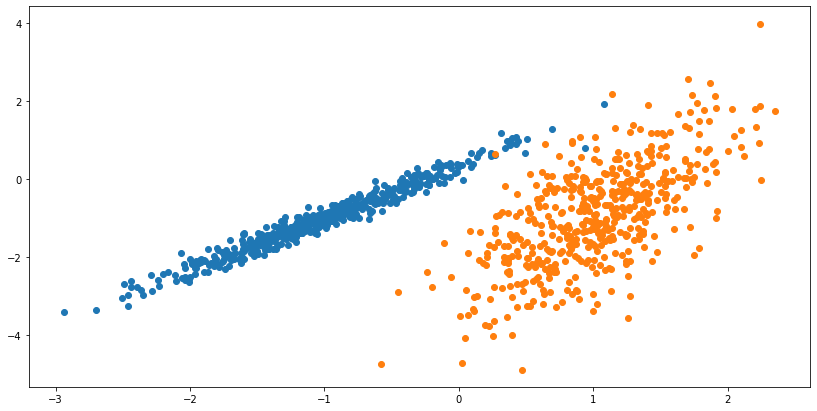

In [3]:
# create scatter plot for samples from each class
plt.figure(figsize=(14,7))

for class_value in range(2):
	# get row indexes for samples with this class
	row_idx = np.where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_idx, 0], X[row_idx, 1])
# show the plot
plt.show()

## Train model

In [4]:
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=2,
      threshold=0.01)

## Create clusters

In [5]:
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)

In [6]:
clusters

array([0, 1])

## Plot clusters

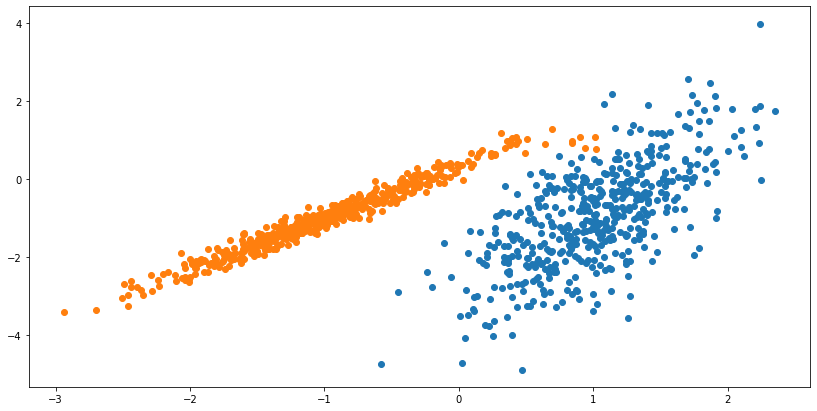

In [7]:
# create scatter plot for samples from each cluster
plt.figure(figsize=(14,7))

for cluster in clusters:
	# get row indexes for samples with this cluster
	row_idx = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_idx, 0], X[row_idx, 1])
# show the plot
plt.show()